<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-23 14:08:27.116796


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

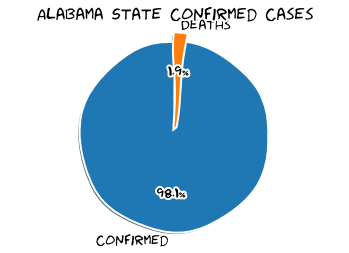

Alabama State Total Population
4887871
Alabama State Confirmed
71813 (1.469208168546183% of population)
Alabama State Deaths
1364 (1.8993775500257615% of confirmed)



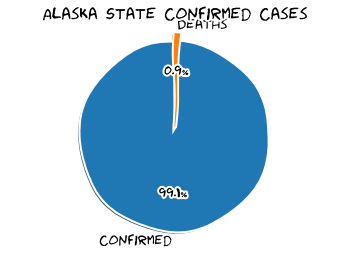

Alaska State Total Population
737438
Alaska State Confirmed
2131 (0.2889734459032488% of population)
Alaska State Deaths
19 (0.8916001877053027% of confirmed)



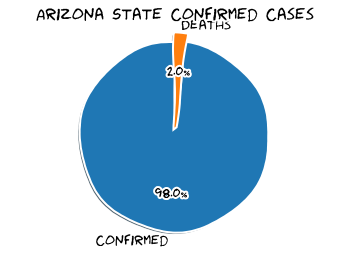

Arizona State Total Population
7171646
Arizona State Confirmed
150609 (2.100061826810749% of population)
Arizona State Deaths
2974 (1.9746495893339706% of confirmed)



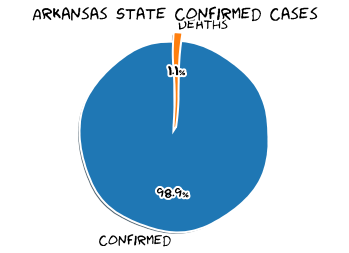

Arkansas State Total Population
3013825
Arkansas State Confirmed
35246 (1.1694773253257902% of population)
Arkansas State Deaths
380 (1.0781365261306246% of confirmed)



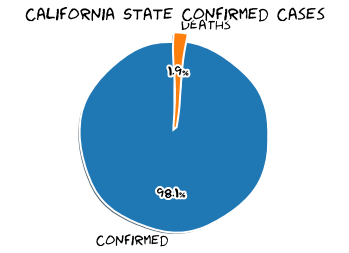

California State Total Population
39557045
California State Confirmed
421462 (1.0654537011043166% of population)
California State Deaths
8050 (1.91001798501407% of confirmed)



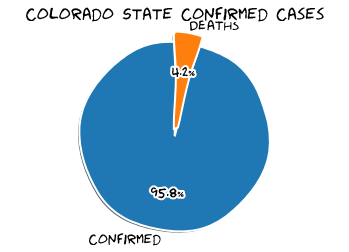

Colorado State Total Population
5695564
Colorado State Confirmed
41680 (0.7317975884390028% of population)
Colorado State Deaths
1771 (4.249040307101727% of confirmed)



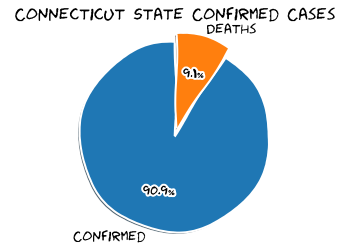

Connecticut State Total Population
3572665
Connecticut State Confirmed
48223 (1.3497767073039313% of population)
Connecticut State Deaths
4406 (9.136718993011634% of confirmed)



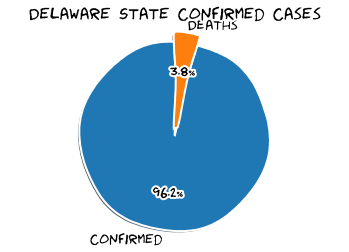

Delaware State Total Population
967171
Delaware State Confirmed
13792 (1.426014634433828% of population)
Delaware State Deaths
527 (3.8210556844547563% of confirmed)



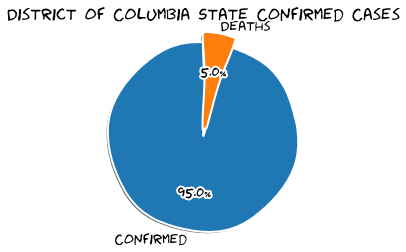

District of Columbia State Total Population
702455
District of Columbia State Confirmed
11529 (1.641243923098277% of population)
District of Columbia State Deaths
580 (5.030791916037818% of confirmed)



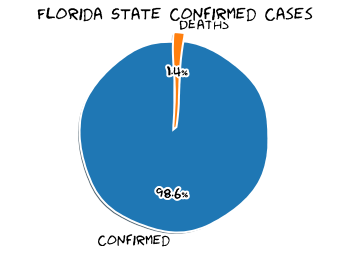

Florida State Total Population
21299325
Florida State Confirmed
379619 (1.782305307797313% of population)
Florida State Deaths
5345 (1.407990643250206% of confirmed)



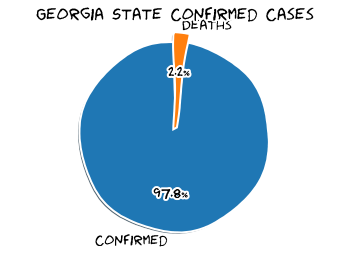

Georgia State Total Population
10519475
Georgia State Confirmed
152302 (1.4478098954558094% of population)
Georgia State Deaths
3335 (2.1897283029769796% of confirmed)



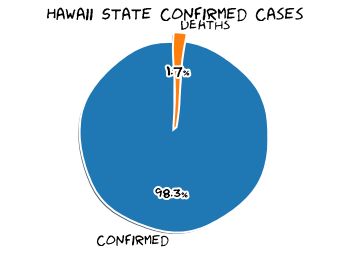

Hawaii State Total Population
1420491
Hawaii State Confirmed
1435 (0.10102140738660083% of population)
Hawaii State Deaths
25 (1.7421602787456445% of confirmed)



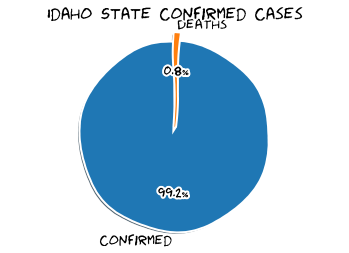

Idaho State Total Population
1754208
Idaho State Confirmed
16322 (0.9304483846841424% of population)
Idaho State Deaths
135 (0.8271045215047176% of confirmed)



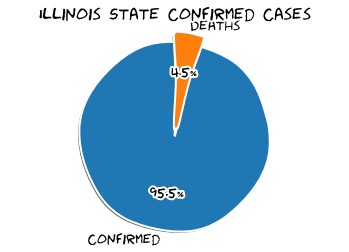

Illinois State Total Population
12741080
Illinois State Confirmed
166475 (1.3066003823851666% of population)
Illinois State Deaths
7540 (4.52920858987836% of confirmed)



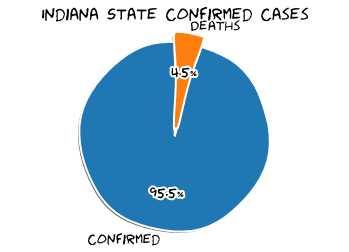

Indiana State Total Population
6691878
Indiana State Confirmed
58673 (0.8767792837825197% of population)
Indiana State Deaths
2666 (4.543827654969066% of confirmed)



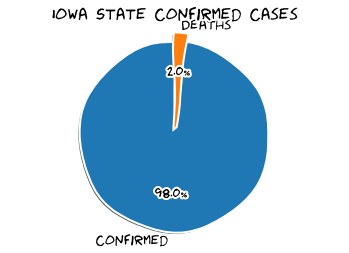

Iowa State Total Population
3156145
Iowa State Confirmed
40493 (1.2829892162749177% of population)
Iowa State Deaths
815 (2.0126935519719455% of confirmed)



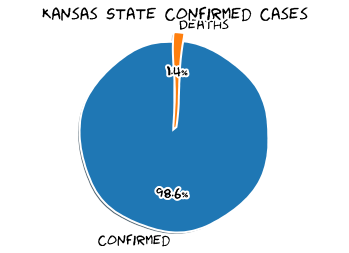

Kansas State Total Population
2911510
Kansas State Confirmed
23481 (0.8064887292161113% of population)
Kansas State Deaths
320 (1.36280396916656% of confirmed)



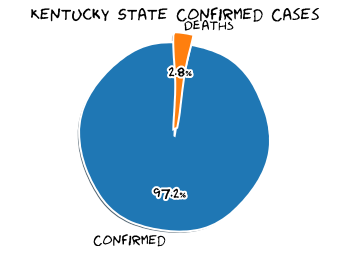

Kentucky State Total Population
4468402
Kentucky State Confirmed
24540 (0.5491896208085127% of population)
Kentucky State Deaths
677 (2.7587612061939693% of confirmed)



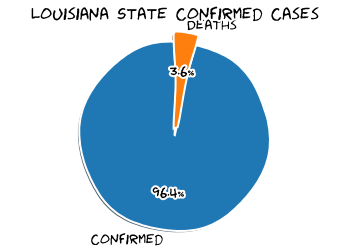

Louisiana State Total Population
4659978
Louisiana State Confirmed
99354 (2.1320701514041485% of population)
Louisiana State Deaths
3558 (3.581134126456911% of confirmed)



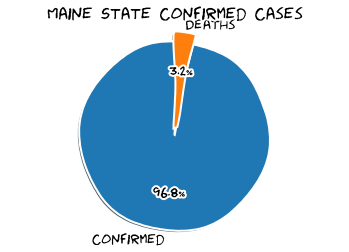

Maine State Total Population
1338404
Maine State Confirmed
3737 (0.2792131523814932% of population)
Maine State Deaths
118 (3.157613058603158% of confirmed)



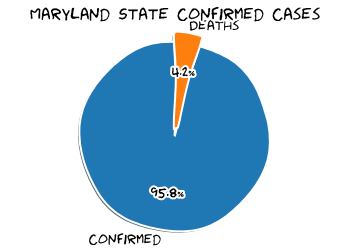

Maryland State Total Population
6042718
Maryland State Confirmed
80172 (1.3267539540981392% of population)
Maryland State Deaths
3393 (4.232150875617423% of confirmed)



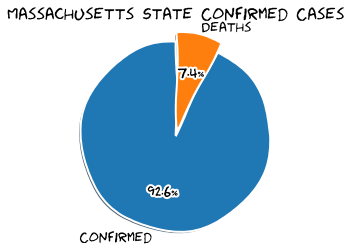

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
114320 (1.6562957420942375% of population)
Massachusetts State Deaths
8468 (7.407277816655003% of confirmed)



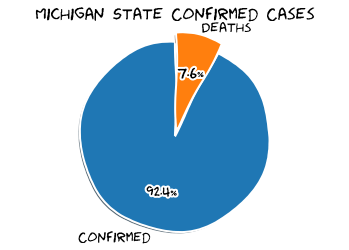

Michigan State Total Population
9995915
Michigan State Confirmed
83730 (0.8376421768292347% of population)
Michigan State Deaths
6388 (7.6292846052788725% of confirmed)



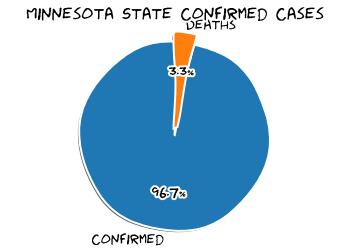

Minnesota State Total Population
5611179
Minnesota State Confirmed
47961 (0.8547401535399245% of population)
Minnesota State Deaths
1592 (3.3193636496319927% of confirmed)



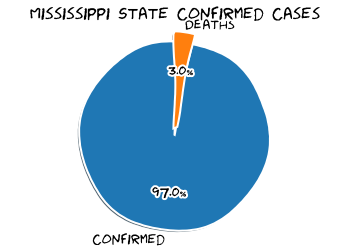

Mississippi State Total Population
2986530
Mississippi State Confirmed
47071 (1.5761100675365725% of population)
Mississippi State Deaths
1423 (3.023092774744535% of confirmed)



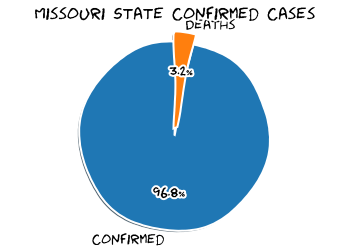

Missouri State Total Population
6126452
Missouri State Confirmed
36497 (0.5957281637071505% of population)
Missouri State Deaths
1159 (3.1756034742581583% of confirmed)



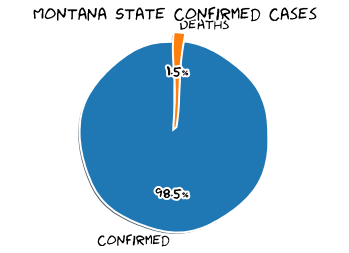

Montana State Total Population
1062305
Montana State Confirmed
2812 (0.2647074051237639% of population)
Montana State Deaths
42 (1.4935988620199145% of confirmed)



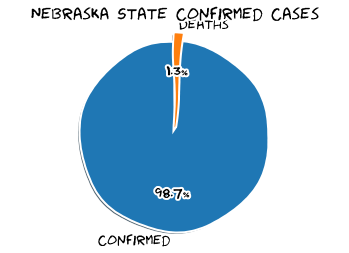

Nebraska State Total Population
1929268
Nebraska State Confirmed
23486 (1.2173529027589738% of population)
Nebraska State Deaths
311 (1.324193136336541% of confirmed)



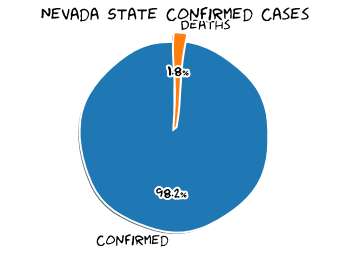

Nevada State Total Population
3034392
Nevada State Confirmed
38657 (1.2739619666806399% of population)
Nevada State Deaths
704 (1.8211449414077658% of confirmed)



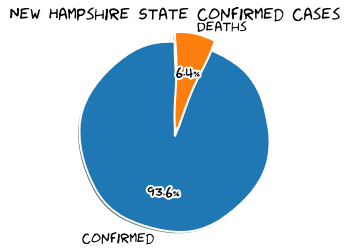

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6295 (0.46407629281555346% of population)
New Hampshire State Deaths
402 (6.386020651310565% of confirmed)



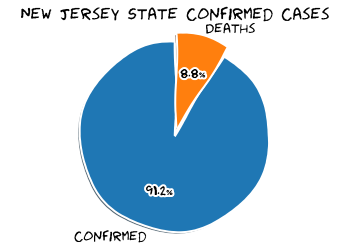

New Jersey State Total Population
8908520
New Jersey State Confirmed
177645 (1.9941022751253856% of population)
New Jersey State Deaths
15707 (8.841791212812069% of confirmed)



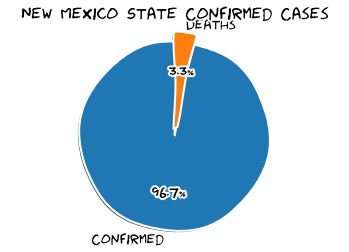

New Mexico State Total Population
2095428
New Mexico State Confirmed
17828 (0.8508047043372524% of population)
New Mexico State Deaths
591 (3.3150100964774514% of confirmed)



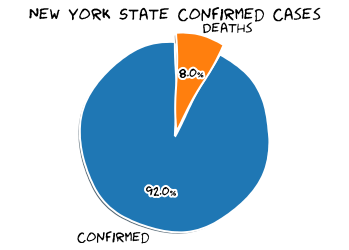

New York State Total Population
19542209
New York State Confirmed
408886 (2.0923223162744806% of population)
New York State Deaths
32558 (7.962610605401016% of confirmed)



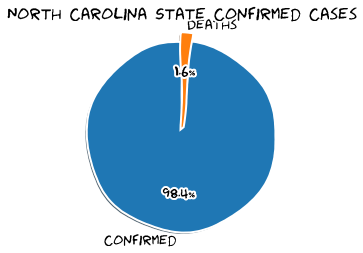

North Carolina State Total Population
10383620
North Carolina State Confirmed
105605 (1.0170345216793373% of population)
North Carolina State Deaths
1739 (1.6467023341697837% of confirmed)



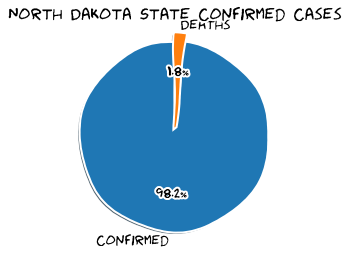

North Dakota State Total Population
760077
North Dakota State Confirmed
5367 (0.7061126701636807% of population)
North Dakota State Deaths
96 (1.7887087758524316% of confirmed)



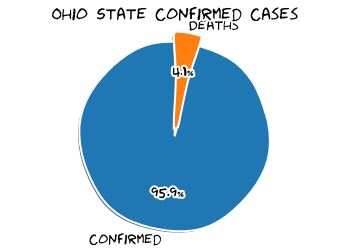

Ohio State Total Population
11689442
Ohio State Confirmed
78742 (0.6736164138544851% of population)
Ohio State Deaths
3235 (4.108353864519571% of confirmed)



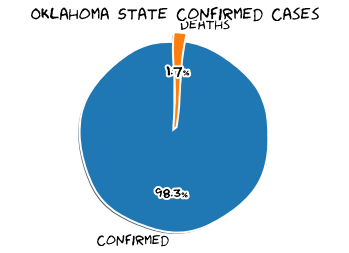

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
28119 (0.713122917395264% of population)
Oklahoma State Deaths
474 (1.68569294782887% of confirmed)



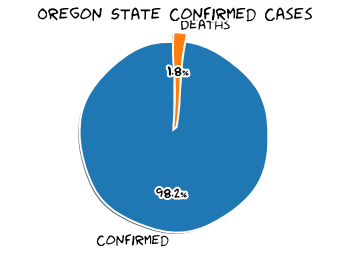

Oregon State Total Population
4190713
Oregon State Confirmed
15393 (0.3673121972323087% of population)
Oregon State Deaths
271 (1.7605405054245435% of confirmed)



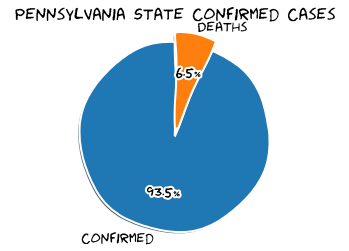

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
108187 (0.8447450078316179% of population)
Pennsylvania State Deaths
7077 (6.541451375858467% of confirmed)



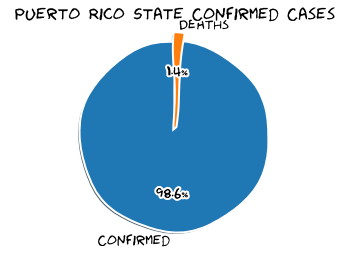

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
13473 (0.4216699481996637% of population)
Puerto Rico State Deaths
188 (1.395383359311215% of confirmed)



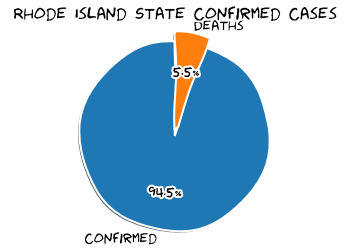

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
18062 (1.7082893934163421% of population)
Rhode Island State Deaths
997 (5.519875982726165% of confirmed)



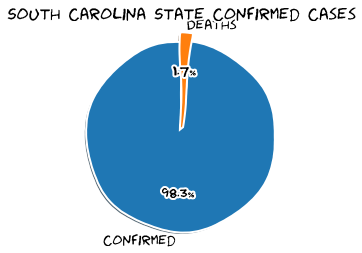

South Carolina State Total Population
5084127
South Carolina State Confirmed
75042 (1.4760056151233043% of population)
South Carolina State Deaths
1285 (1.7123744036672797% of confirmed)



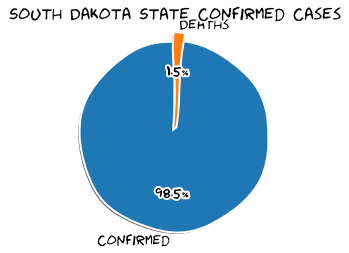

South Dakota State Total Population
882235
South Dakota State Confirmed
8077 (0.9155157072662046% of population)
South Dakota State Deaths
119 (1.4733193017209358% of confirmed)



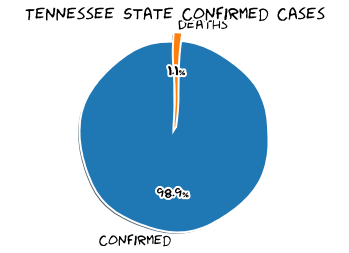

Tennessee State Total Population
6770010
Tennessee State Confirmed
84417 (1.2469257800210043% of population)
Tennessee State Deaths
888 (1.0519208216354525% of confirmed)



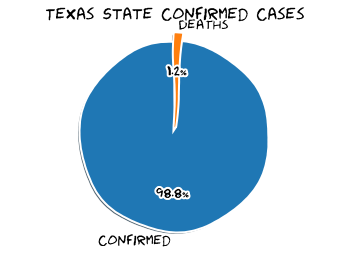

Texas State Total Population
28701845
Texas State Confirmed
363615 (1.2668697778836169% of population)
Texas State Deaths
4439 (1.2207967218074063% of confirmed)



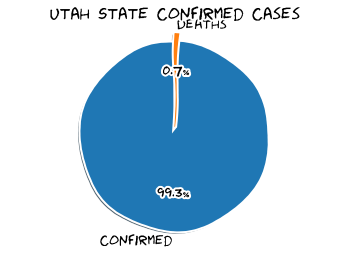

Utah State Total Population
3161105
Utah State Confirmed
35578 (1.1254925097394741% of population)
Utah State Deaths
260 (0.730788689639665% of confirmed)



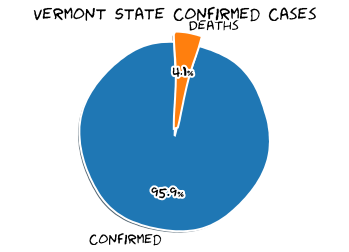

Vermont State Total Population
626299
Vermont State Confirmed
1366 (0.21810668706161115% of population)
Vermont State Deaths
56 (4.099560761346998% of confirmed)



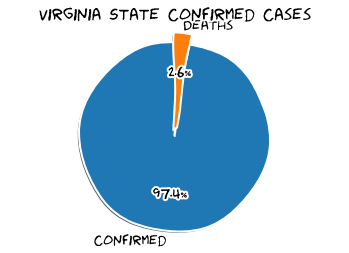

Virginia State Total Population
8517685
Virginia State Confirmed
80393 (0.9438362653702268% of population)
Virginia State Deaths
2051 (2.5512171457713984% of confirmed)



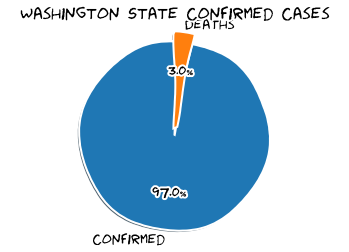

Washington State Total Population
7535591
Washington State Confirmed
49247 (0.6535253837422971% of population)
Washington State Deaths
1468 (2.9808922370905844% of confirmed)



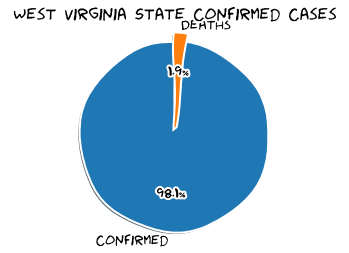

West Virginia State Total Population
1805832
West Virginia State Confirmed
5212 (0.288620425377333% of population)
West Virginia State Deaths
101 (1.9378357636224097% of confirmed)



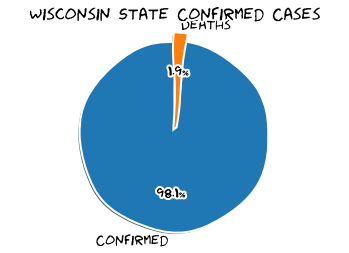

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
44847 (0.771419548201724% of population)
Wisconsin State Deaths
865 (1.9287800744754386% of confirmed)



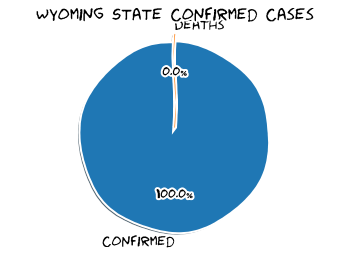

Wyoming State Total Population
577737
Wyoming State Confirmed
2288 (0.39602795043419414% of population)
Wyoming State Deaths
1 (0.043706293706293704% of confirmed)



In [10]:
for i in states:
    state_details(i)

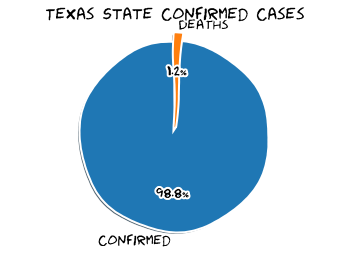

Texas State Total Population
28701845
Texas State Confirmed
363615 (1.2668697778836169% of population)
Texas State Deaths
4439 (1.2207967218074063% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
3972162
US Deaths
142970

New York City Confirmed
222444
New York City Deaths
23428

Philippines Confirmed
72269
Philippines Deaths
1843



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 15258470},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 624213},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-23T13:35:07.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 8702439},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-23 05:15:04,34.22333378,-82.46170658,249,2,0,247,"Abbeville, South Carolina, US",1015.207730256452,0.8032128514056225
1,22001,Acadia,Louisiana,US,2020-07-23 05:15:04,30.295064899999996,-92.41419698,2011,59,0,1952,"Acadia, Louisiana, US",3241.1959061971147,2.9338637493784185
2,51001,Accomack,Virginia,US,2020-07-23 05:15:04,37.76707161,-75.63234615,1057,15,0,1042,"Accomack, Virginia, US",3270.8255972273796,1.4191106906338695
3,16001,Ada,Idaho,US,2020-07-23 05:15:04,43.4526575,-116.24155159999998,6423,40,0,6383,"Ada, Idaho, US",1333.7154034473524,0.6227619492449011
4,19001,Adair,Iowa,US,2020-07-23 05:15:04,41.33075609,-94.47105874,21,0,0,21,"Adair, Iowa, US",293.6241610738255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,,,Unknown,Colombia,2020-07-17 22:34:48,,,0,0,0,0,"Unknown, Colombia",,
3921,2070,Dillingham,Alaska,US,2020-07-17 18:35:12,59.79603738,-158.23819419999995,1,0,0,1,"Dillingham, Alaska, US",20.34174125305126,0.0
3922,,,Grand Princess,Canada,2020-07-13 12:34:33,,,13,0,13,0,"Grand Princess, Canada",,0.0
3923,16061,Lewis,Idaho,US,2020-07-10 02:34:22,46.23315327,-116.434146,1,0,0,1,"Lewis, Idaho, US",26.055237102657642,0.0


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595511307000,40.767273,-73.971526,222444,0,23428,199016,New York City,36061,"New York City, New York, US",2668.212580,None,None,84036061,USA
1,California,US,1595511307000,34.308284,-118.228241,165134,0,4215,160919,Los Angeles,06037,"Los Angeles, California, US",1644.907261,None,None,84006037,USA
2,Arizona,US,1595511307000,33.348359,-112.491815,100543,0,1599,98944,Maricopa,04013,"Maricopa, Arizona, US",2241.554514,None,None,84004013,USA
3,Illinois,US,1595511307000,41.841448,-87.816588,100124,0,4801,95323,Cook,17031,"Cook, Illinois, US",1944.067385,None,None,84017031,USA
4,Florida,US,1595511307000,25.611236,-80.551706,92345,0,1342,91003,Miami-Dade,12086,"Miami-Dade, Florida, US",3398.860483,None,None,84012086,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Nebraska,US,1595511307000,41.913590,-100.555663,1,0,0,1,Thomas,31171,"Thomas, Nebraska, US",138.504155,None,None,84031171,USA
3192,Montana,US,1595511307000,46.959252,-104.251093,1,0,0,1,Wibaux,30109,"Wibaux, Montana, US",103.199174,None,None,84030109,USA
3193,Kansas,US,1595511307000,38.481783,-101.347151,1,0,0,1,Wichita,20203,"Wichita, Kansas, US",47.192072,None,None,84020203,USA
3194,Alaska,US,1595010912000,59.796037,-158.238194,1,0,0,1,Dillingham,02070,"Dillingham, Alaska, US",20.341741,None,None,84002070,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595511307000,40.767273,-73.971526,222444,0,23428,199016,New York City,36061,"New York City, New York, US",2668.212580,None,None,84036061,USA
8,New York,US,1595511307000,40.740665,-73.589419,42765,0,2193,40572,Nassau,36059,"Nassau, New York, US",3151.613502,None,None,84036059,USA
9,New York,US,1595511307000,40.883201,-72.801217,42621,0,1995,40626,Suffolk,36103,"Suffolk, New York, US",2886.426326,None,None,84036103,USA
10,New York,US,1595511307000,41.162784,-73.757417,35636,0,1442,34194,Westchester,36119,"Westchester, New York, US",3683.284651,None,None,84036119,USA
50,New York,US,1595511307000,41.150279,-74.025605,13812,0,673,13139,Rockland,36087,"Rockland, New York, US",4239.553822,None,None,84036087,USA
67,New York,US,1595511307000,41.403375,-74.302408,10960,0,489,10471,Orange,36071,"Orange, New York, US",2847.196966,None,None,84036071,USA
101,New York,US,1595511307000,42.762490,-78.730637,8135,0,663,7472,Erie,36029,"Erie, New York, US",885.488439,None,None,84036029,USA
171,New York,US,1595511307000,43.146389,-77.693229,4492,0,277,4215,Monroe,36055,"Monroe, New York, US",605.578549,None,None,84036055,USA
175,New York,US,1595511307000,41.764861,-73.743567,4387,0,153,4234,Dutchess,36027,"Dutchess, New York, US",1491.071246,None,None,84036027,USA
218,New York,US,1595511307000,43.004919,-76.199712,3326,0,194,3132,Onondaga,36067,"Onondaga, New York, US",722.214502,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

408886

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1595511307000,40.767273,-73.971526,222444,0,23428,199016,New York City,36061,"New York City, New York, US",2668.21258,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
40,None,Philippines,1595414105000,12.879721,121.774017,72269,23623,1843,46803,None,None,Philippines,65.95025,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
